# Mid-test: Python Use Case (Victoria Case)



##### Zumarsiyah Mahsyari
##### Astra Data Scientist Bootcamp

**Dataset** : Apartment Price in Victoria. 

You can download it here.
https://drive.google.com/open?id=1j8TdXtCnEQlqn2esDbiuPay01pDooS-w

**Background** : The Dataset provides living area and conservation status.
There are 218 observations and 16 variables.

**Objective** : Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to determine the best model and give the reason.

Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.

**Instructions** :
Download the dataset as a CSV file and place it in your current working directory with the filename "victoria.csv".


1. Import Dataset: Load the dataset.
2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)
3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.
4. Variable Selection: Choose the variable and its reason.
5. Modelling: Create models using Regression
6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

 ### Import Dataset: Load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and read data can be done with the following steps.

In [2]:
df = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/Midtest/victoria.csv")
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


### Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)

The data read is still not ready to be processed. Before we switch to EDA, we first do preprocessing data. The data preprocessing is done, including deleting unnecessary columns, cleansing data, updating the data (redefine conservation status), and making sure the data type is correct.

In [3]:
#delete unnecessary columns
df = df.drop('row.labels', axis=1)
df.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 15 columns):
totalprice        218 non-null object
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(7), object(8)
memory usage: 25.6+ KB


In [5]:
# found that the data went wrong, then it will be deleted
df.loc[8,:]

totalprice          188982,2
area              5847999954
zone                     Z11
category                  4B
age                       37
floor                      4
rooms                      4
out                      E25
conservation              2A
toilets                    1
garage                     0
elevator                   0
streetcategory            S4
heating                   3A
tras                       1
Name: 8, dtype: object

In [6]:
df = df.drop([8])
df.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 217
Data columns (total 15 columns):
totalprice        217 non-null object
area              217 non-null object
zone              217 non-null object
category          217 non-null object
age               217 non-null int64
floor             217 non-null int64
rooms             217 non-null int64
out               217 non-null object
conservation      217 non-null object
toilets           217 non-null int64
garage            217 non-null int64
elevator          217 non-null int64
streetcategory    217 non-null object
heating           217 non-null object
tras              217 non-null int64
dtypes: int64(7), object(8)
memory usage: 27.1+ KB


In [8]:
#change the totalprice data type to int64
df['totalprice'] = df['totalprice'].astype(int)

#redefine conservation status
df.loc[(df.conservation == '1A'), 'new_conservation'] = 'A'
df.loc[(df.conservation == '2A'), 'new_conservation'] = 'B' 
df.loc[(df.conservation == '2B') | (df.conservation == '3A'), 'new_conservation'] = 'C'

df.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras,new_conservation
0,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0,C
1,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1,A
2,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0,A
3,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0,B
4,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1,A


**Summary numerical data**

Numerical data in the dataset are totalprice, age, floor, rooms, toilets, garage, elevator, and tras.

In [9]:
numerik = df[['totalprice', 'age', 'floor', 'rooms', 'toilets', 'garage', 'elevator', 'tras']]

To get the mean, median, mode, maximum, minimum, and range of data, you can do the following functions.

In [10]:
mean = numerik.mean()
median = numerik.median()
maksimal = numerik.max()
minimal = numerik.min()
mode = numerik.mode()
jangkauan = maksimal - minimal

Because the result of the mode is a column-shaped dataframe, it needs to be transposed so that the results can be combined with other calculation results.

In [11]:
mode = mode.T
mode = mode.rename(columns={0:'Modus'})

EDA results for numerical data that have been obtained, summarized in the dataframe below.

In [12]:
column = {'Mean':mean, 'Median':median, 'Max':maksimal, 'Min':minimal, 'Range':jangkauan, 'Modus':mode['Modus']}
eda_numerik = pd.DataFrame(column).round(2)
eda_numerik

,Mean,Median,Max,Min,Range,Modus
totalprice,281164.38,270000.0,560000,155000,405000,270000
age,19.82,16.0,118,1,117,11
floor,4.44,4.0,12,1,11,3
rooms,4.86,5.0,7,3,4,5
toilets,1.47,1.0,2,1,1,1
garage,0.24,0.0,2,0,2,0
elevator,0.80,1.0,1,0,1,1
tras,0.81,1.0,2,0,2,1


**Summary Categorical Data**

Categorical data in the dataset are zone, category, out, conservations, streetcategory, and heating.

In [13]:
kategori = df[['zone', 'category', 'out', 'conservation', 'streetcategory', 'heating']]

EDA results for numerical data that have been obtained, summarized in the dataframe below.

In [14]:
kategori.describe()

,zone,category,out,conservation,streetcategory,heating
count,217,217,217,217,217,217
unique,23,7,4,4,4,4
top,Z41,3B,E100,1A,S3,3A
freq,18,77,122,161,107,148


### Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem

**Histogram of totalprice**

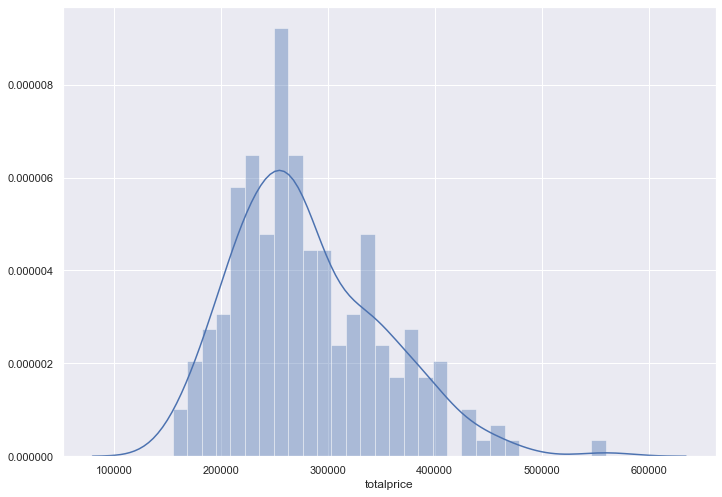

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['totalprice'], bins=30)
plt.show()

The histogram of total prices above tends to be positive skewed. The histogram of total prices above tends to be positive skewed. From this histogram, it can be seen that the total prices of apartments in Victoria are in the range of 200000 - 300000.

**Scatterplot of totalprice and other numerical data**

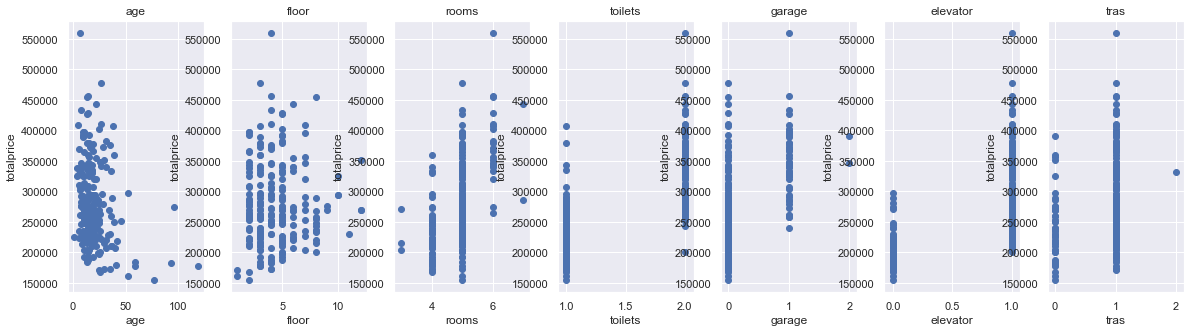

In [16]:
plt.figure(figsize=(20, 5))

features = ['age', 'floor', 'rooms', 'toilets', 'garage', 'elevator', 'tras']
target = df['totalprice']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('totalprice')

### Variable Selection: Choose the variable and its reason.

In [17]:
X = df[['age', 'floor', 'rooms', 'toilets', 'garage', 'elevator', 'tras']]
Y = df['totalprice']

C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.49582313 0.27784399 0.10490666 0.0130548  0.04387617 0.01513918
 0.04935606]


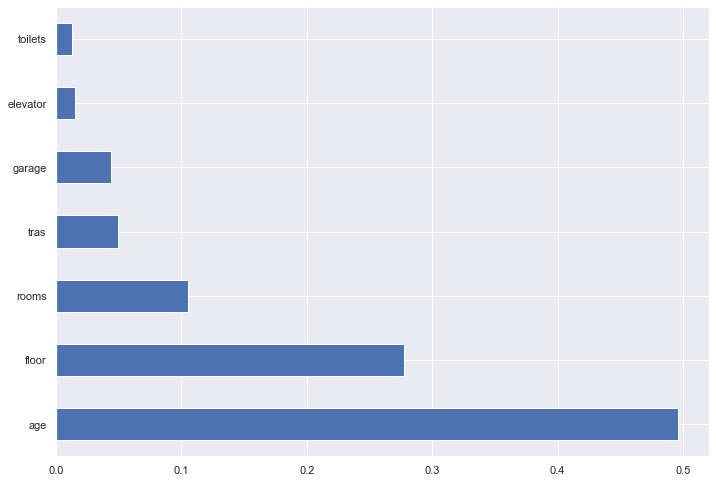

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Variables that are used as predictor variables are all numeric data in the dataset. It can be seen in the bar chart above that each of these variables has different levels of significance to the response variable (total price).

### Modelling: Create models using Regression Linier

In [19]:
df.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras,new_conservation
0,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0,C
1,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1,A
2,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0,A
3,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0,B
4,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1,A


To model data using regression, we need to divide the data into training and testing. This time, we use 70% training data and 30% testing data.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(151, 7)
(66, 7)
(151,)
(66,)


In [21]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 44429.3035510456
R2 score is 0.609922507547286


The model performance for testing set
--------------------------------------
RMSE is 36768.19084440737
R2 score is 0.6689296304020838


Based on the above results, it can be concluded that the resulting model is fit because the R ^ 2 score between training and testing is not too far away where R^2 score for training data is 60,99% and R^2 score for testing data is 66,89%.

In addition, RMSE for training data is known to be as big as 44429,30 and RMSE for testing data is as big as 36768,1908.

R2 score is 66,89% shows that predictor variables are able to explain the total price as much as 66,89%, while 33,11% explained by other variables.